# Explore lnd_in file (surface data)

In [53]:
import numpy as np
import netCDF4 as nc
import xarray as xr
xr.set_options(display_style='html')
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import cartopy.feature as cfeature
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

In [54]:
# Import surface data file: 
fn='data/surfdata_1.9x2.5_hist_16pfts_Irrig_CMIP6_simyr2000_c190304.nc'
dset_in = xr.open_dataset(fn)

In [55]:
# Explore the imported dataset with its variables etc...
dset_in
# It's a three dimensional dset:
# - time
# - cft: number of CropFT
# - natpft: number of PlantFT
# and other dimensions
# variables: https://noresm-docs.readthedocs.io/en/latest/output/clm_standard_out.html

<xarray.Dataset>
Dimensions:                  (cft: 2, lsmlat: 96, lsmlon: 144, lsmpft: 17, natpft: 15, nglcec: 10, nglcecp1: 11, nlevsoi: 10, nlevurb: 5, numrad: 2, numurbl: 3, time: 12)
Coordinates:
  * natpft                   (natpft) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14
  * cft                      (cft) int32 15 16
  * time                     (time) int32 1 2 3 4 5 6 7 8 9 10 11 12
Dimensions without coordinates: lsmlat, lsmlon, lsmpft, nglcec, nglcecp1, nlevsoi, nlevurb, numrad, numurbl
Data variables:
    mxsoil_color             int32 ...
    SOIL_COLOR               (lsmlat, lsmlon) int32 ...
    PCT_SAND                 (nlevsoi, lsmlat, lsmlon) float64 ...
    PCT_CLAY                 (nlevsoi, lsmlat, lsmlon) float64 ...
    ORGANIC                  (nlevsoi, lsmlat, lsmlon) float64 ...
    FMAX                     (lsmlat, lsmlon) float64 ...
    LANDFRAC_PFT             (lsmlat, lsmlon) float64 ...
    PFTDATA_MASK             (lsmlat, lsmlon) int32 ...
    PCT_NATVEG               (lsmlat, lsmlon) float64 ...
    PCT_CROP                 (lsmlat, lsmlon) float64 ...
    PCT_NAT_PFT              (natpft, lsmlat, lsmlon) float64 ...
    PCT_CFT                  (cft, lsmlat, lsmlon) float64 ...
    MONTHLY_LAI              (time, lsmpft, lsmlat, lsmlon) float64 ...
    MONTHLY_SAI              (time, lsmpft, lsmlat, lsmlon) float64 ...
    MONTHLY_HEIGHT_TOP       (time, lsmpft, lsmlat, lsmlon) float64 ...
    MONTHLY_HEIGHT_BOT       (time, lsmpft, lsmlat, lsmlon) float64 ...
    AREA                     (lsmlat, lsmlon) float64 ...
    LONGXY                   (lsmlat, lsmlon) float64 ...
    LATIXY                   (lsmlat, lsmlon) float64 ...
    EF1_BTR                  (lsmlat, lsmlon) float64 ...
    EF1_FET                  (lsmlat, lsmlon) float64 ...
    EF1_FDT                  (lsmlat, lsmlon) float64 ...
    EF1_SHR                  (lsmlat, lsmlon) float64 ...
    EF1_GRS                  (lsmlat, lsmlon) float64 ...
    EF1_CRP                  (lsmlat, lsmlon) float64 ...
    CANYON_HWR               (numurbl, lsmlat, lsmlon) float64 ...
    EM_IMPROAD               (numurbl, lsmlat, lsmlon) float64 ...
    EM_PERROAD               (numurbl, lsmlat, lsmlon) float64 ...
    EM_ROOF                  (numurbl, lsmlat, lsmlon) float64 ...
    EM_WALL                  (numurbl, lsmlat, lsmlon) float64 ...
    HT_ROOF                  (numurbl, lsmlat, lsmlon) float64 ...
    THICK_ROOF               (numurbl, lsmlat, lsmlon) float64 ...
    THICK_WALL               (numurbl, lsmlat, lsmlon) float64 ...
    T_BUILDING_MIN           (numurbl, lsmlat, lsmlon) float64 ...
    WIND_HGT_CANYON          (numurbl, lsmlat, lsmlon) float64 ...
    WTLUNIT_ROOF             (numurbl, lsmlat, lsmlon) float64 ...
    WTROAD_PERV              (numurbl, lsmlat, lsmlon) float64 ...
    ALB_IMPROAD_DIR          (numrad, numurbl, lsmlat, lsmlon) float64 ...
    ALB_IMPROAD_DIF          (numrad, numurbl, lsmlat, lsmlon) float64 ...
    ALB_PERROAD_DIR          (numrad, numurbl, lsmlat, lsmlon) float64 ...
    ALB_PERROAD_DIF          (numrad, numurbl, lsmlat, lsmlon) float64 ...
    ALB_ROOF_DIR             (numrad, numurbl, lsmlat, lsmlon) float64 ...
    ALB_ROOF_DIF             (numrad, numurbl, lsmlat, lsmlon) float64 ...
    ALB_WALL_DIR             (numrad, numurbl, lsmlat, lsmlon) float64 ...
    ALB_WALL_DIF             (numrad, numurbl, lsmlat, lsmlon) float64 ...
    TK_ROOF                  (nlevurb, numurbl, lsmlat, lsmlon) float64 ...
    TK_WALL                  (nlevurb, numurbl, lsmlat, lsmlon) float64 ...
    TK_IMPROAD               (nlevurb, numurbl, lsmlat, lsmlon) float64 ...
    CV_ROOF                  (nlevurb, numurbl, lsmlat, lsmlon) float64 ...
    CV_WALL                  (nlevurb, numurbl, lsmlat, lsmlon) float64 ...
    CV_IMPROAD               (nlevurb, numurbl, lsmlat, lsmlon) float64 ...
    NLEV_IMPROAD             (numurbl, lsmlat, lsmlon) int32 ...
    peatf                    (ls

In [56]:
# Select PFT: percent plant functional type on the natural veg landunit (% of landunit)
# OBS! variable is centered, related to the ammount of land (full coloured even if )
pfts = dset_in.PCT_NAT_PFT
pfts

<xarray.DataArray 'PCT_NAT_PFT' (natpft: 15, lsmlat: 96, lsmlon: 144)>
[207360 values with dtype=float64]
Coordinates:
  * natpft   (natpft) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14
Dimensions without coordinates: lsmlat, lsmlon
Attributes:
    long_name:  percent plant functional type on the natural veg landunit (% ...
    units:      unitless

In [57]:
# BOREAL NAT PDFs:
# - 2: NET Boreal
# - 3: NDT Boreal
# - 8: BDT Boreal
# - 11: BDS Boreal
# - 12: artic C3 grass
# - 13: C3 grass
# - 14: C4 grass
#Others:
# - 0: Bare Ground
# - 1: NET Temperate
# - 4: BET Tropical
# - 5: BET Temperate
# - 6: BDT Tropical
# - 7: BDT Temperate
# - 10: BDS Temperate

## Maps

### Quick overview of the PFTs

In [58]:
#pfts.isel(natpft=slice(2,3)).plot()

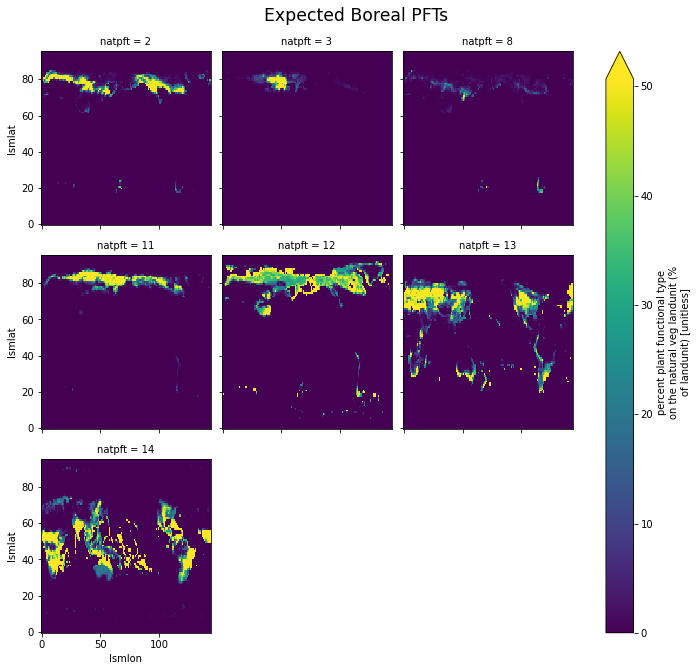

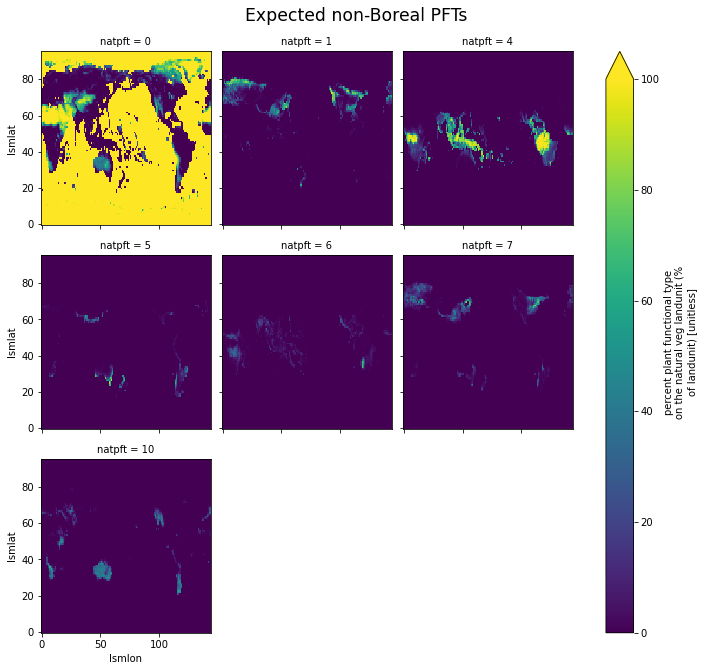

In [59]:
p = pfts.isel(natpft=[2,3,8,11,12,13,14]).plot(x='lsmlon', y='lsmlat', col='natpft', col_wrap=3,robust=True, cmap='viridis')
p.fig.suptitle("Expected Boreal PFTs",y=1.03, size='xx-large')

p= pfts.isel(natpft=[0,1,4,5,6,7,10]).plot(x='lsmlon', y='lsmlat', col='natpft', col_wrap=3,robust=True, cmap='viridis')
p.fig.suptitle("Expected non-Boreal PFTs",y=1.03, size='xx-large')
plt.show()

### Select PFTs in the boreal zone

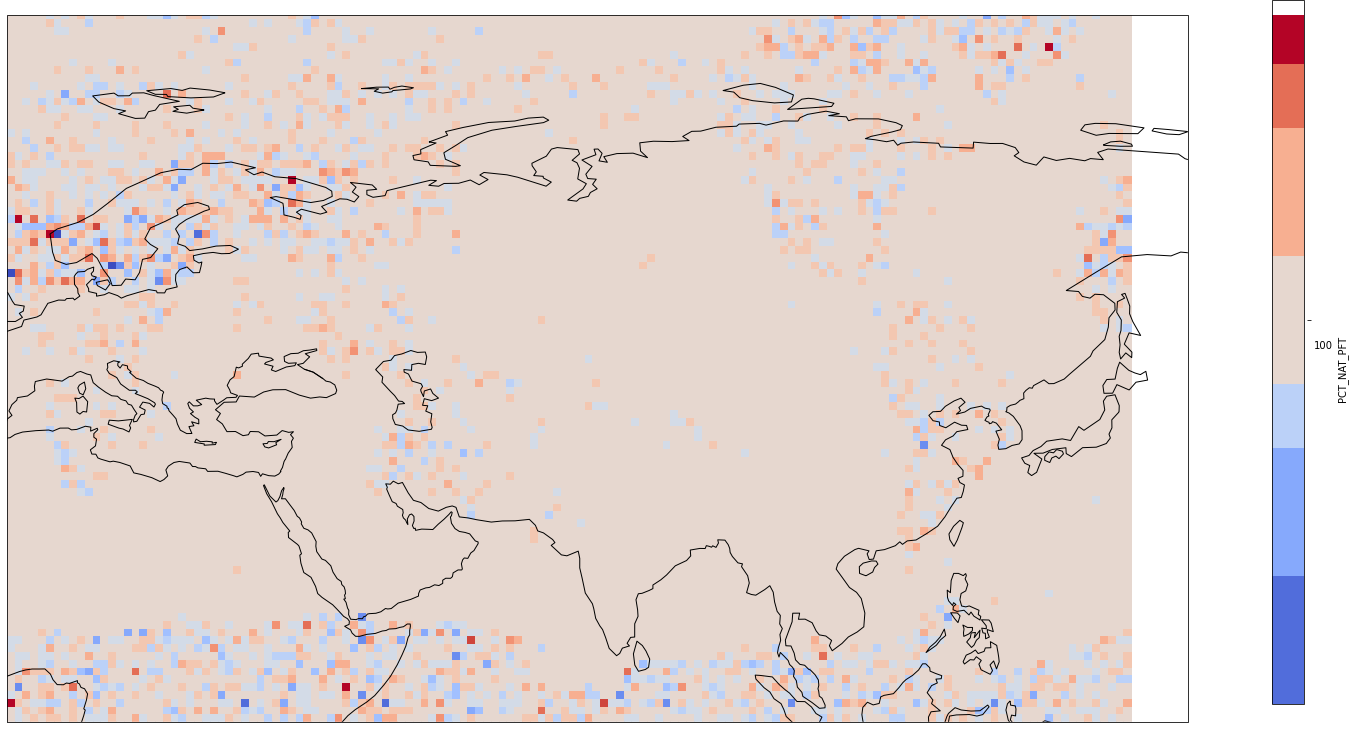

In [23]:
fig = plt.figure(1, figsize=[30,13])
ax = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.coastlines()

pfts.isel(natpft=[0,2,3,8,11,12,13,14]).plot(x='lsmlon', y='lsmlat', col='natpft', col_wrap=3,robust=True, cmap='viridis')


pfts.sum('natpft').plot.pcolormesh(ax=ax, x='lsmlon', y='lsmlat', cmap='coolwarm')
plt.show()

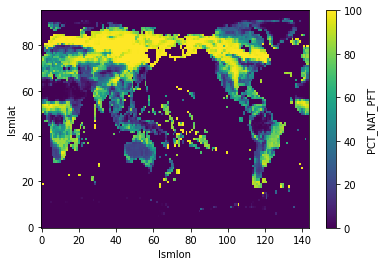

In [60]:
pfts_b1=pfts.isel(natpft=[2,3,8,11,12,13,14])
pfts_b1.sum('natpft').plot()

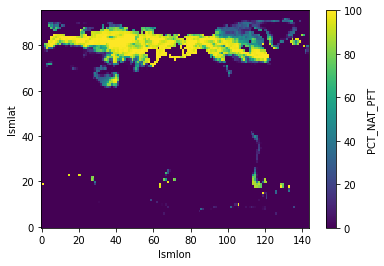

In [61]:
pfts_b=pfts.isel(natpft=[2,3,8,11,12])
pfts_b.sum('natpft').plot()

## Mask

In [10]:
pfts_b_mask = pfts_b.where(pfts>0)
#pftsmask    = pftsmask.rename({'natpft':'pft','lsmlat':'lat','lsmlon':'lon'})

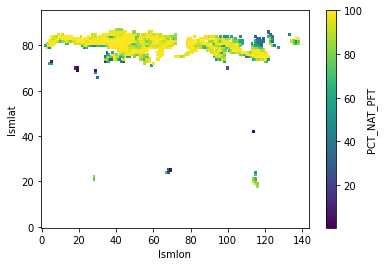

In [11]:
pfts_b_mask.sum('natpft', skipna=False).plot()

## Maps - prettier

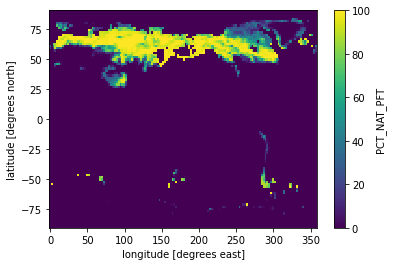

In [15]:
dset_in['lsmlat'] = dset_in['LATIXY'].isel(lsmlon=0)
dset_in['lsmlon'] = dset_in['LONGXY'].isel(lsmlat=0)

pfts_b = dset_in.PCT_NAT_PFT.isel(natpft=[2,3,8,11,12])

pfts_b.sum('natpft').plot()

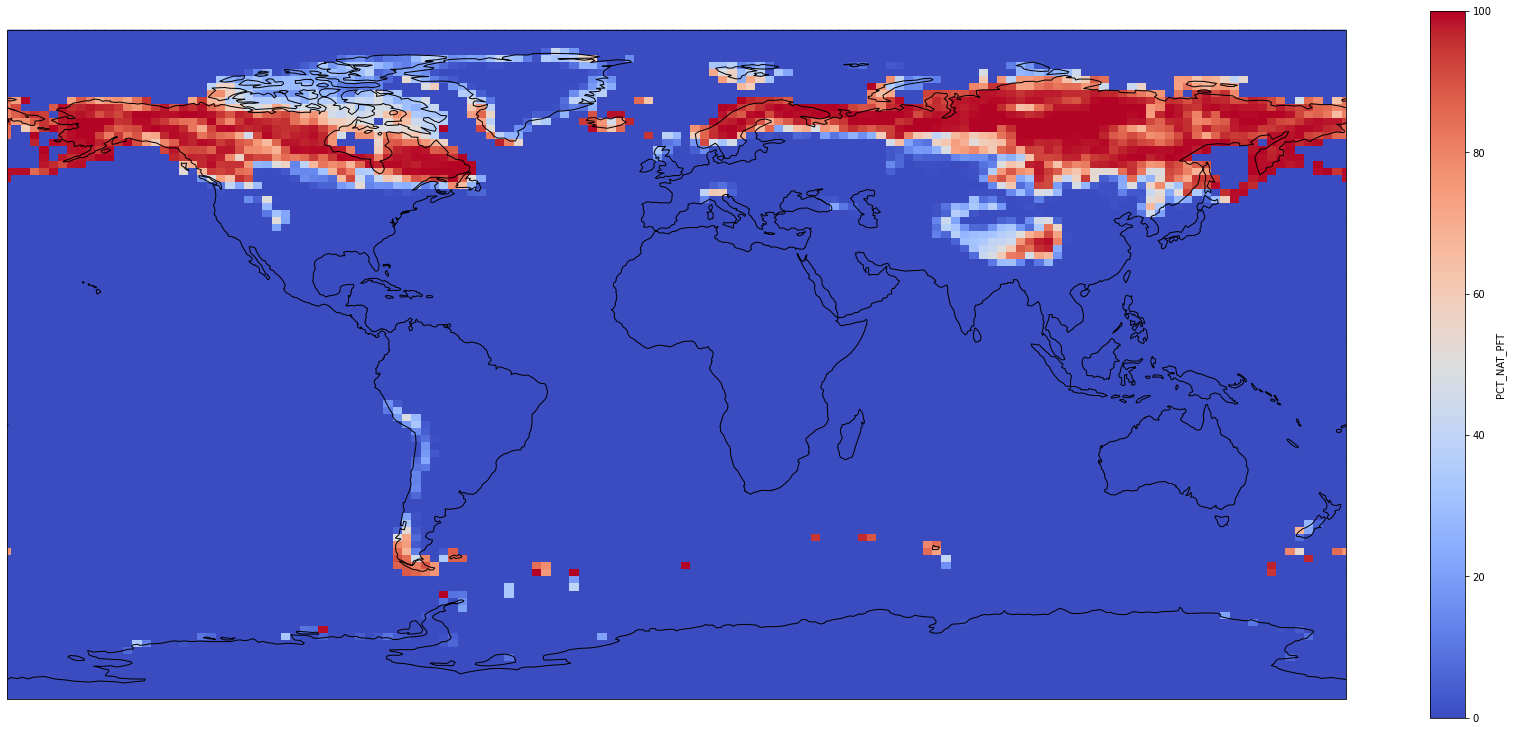

In [16]:
fig = plt.figure(1, figsize=[30,13])
ax = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.coastlines()

pfts_b.sum('natpft').plot.pcolormesh(ax=ax, x='lsmlon', y='lsmlat', cmap='coolwarm')
plt.show()

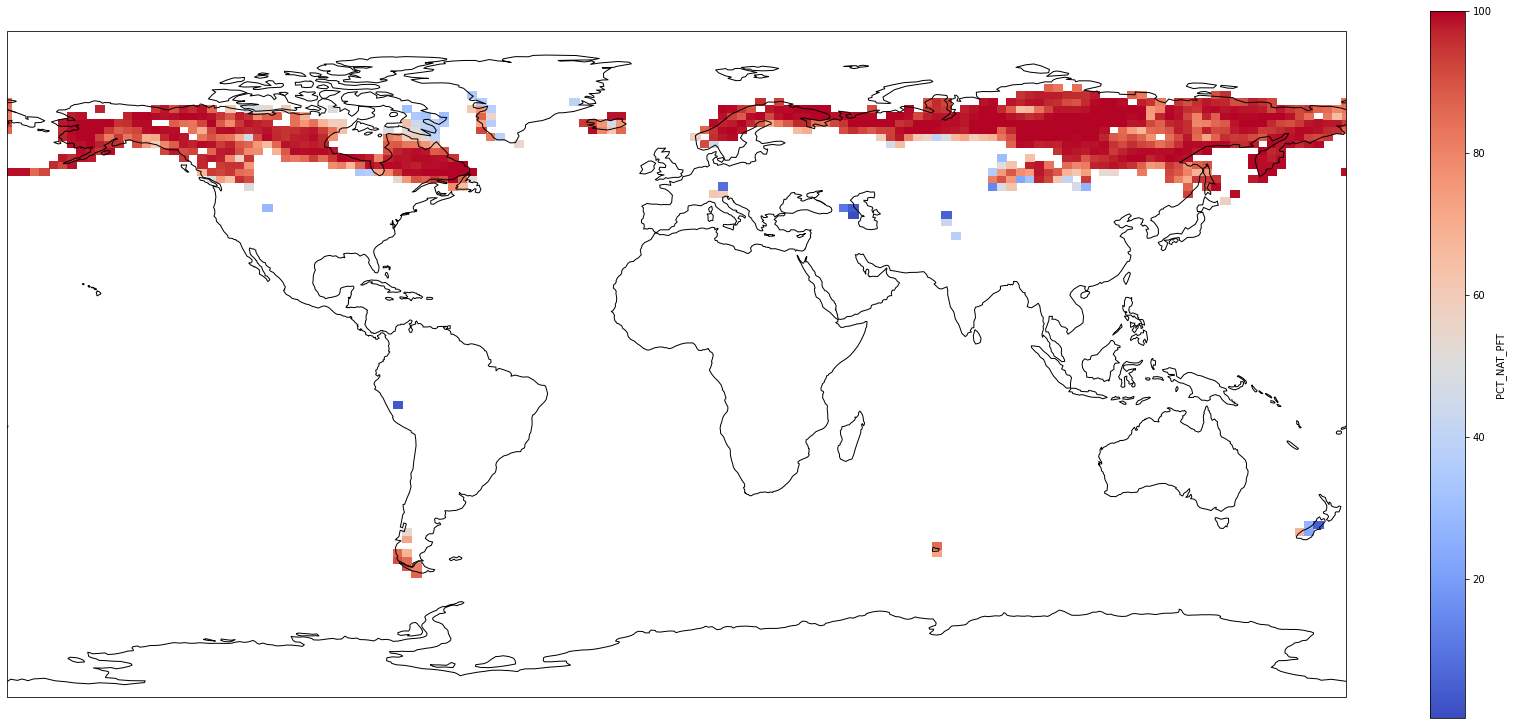

In [17]:
pfts_b_mask = pfts_b.where(pfts>0)

fig = plt.figure(1, figsize=[30,13])
ax = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.coastlines()

pfts_b_mask.sum('natpft', skipna=False).plot.pcolormesh(ax=ax, x='lsmlon', y='lsmlat', cmap='coolwarm')
plt.show()

ImportError: OWSLib is required to use OGC web services.

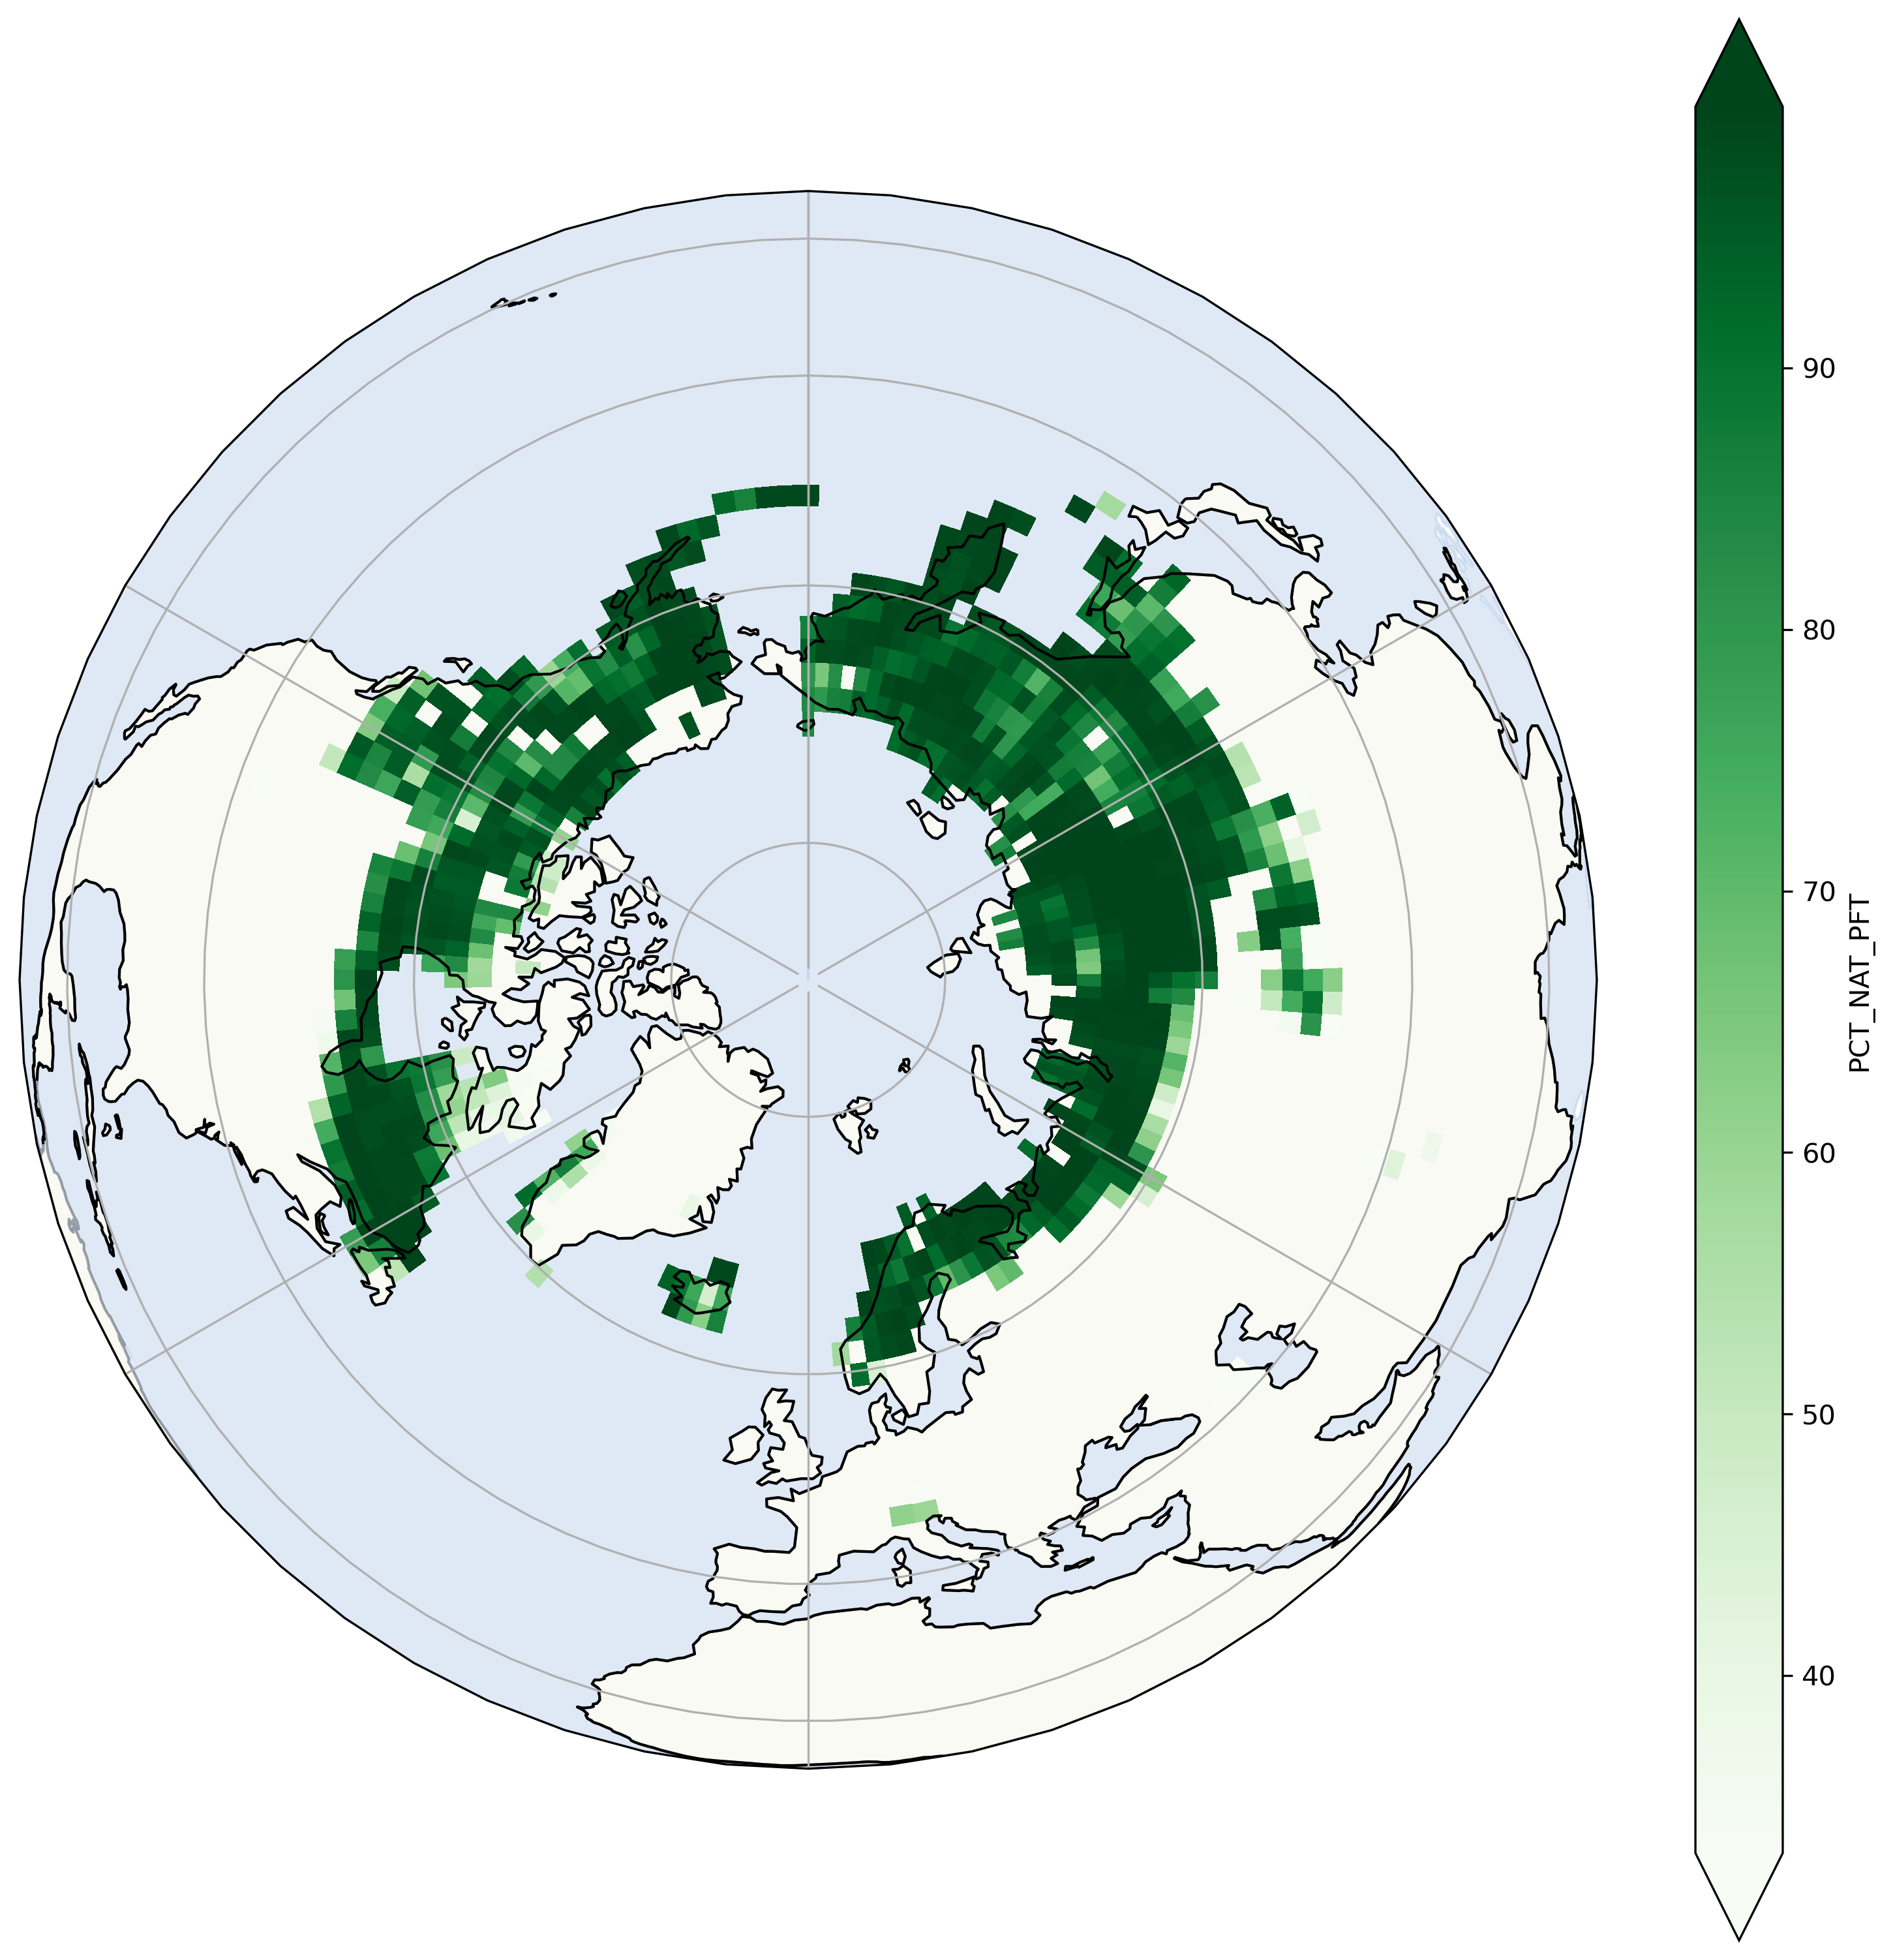

In [88]:
fig = plt.figure(1, figsize=[13,13],dpi=300)

ax = plt.axes(projection=ccrs.Orthographic(0, 90))

#ax.add_feature(cartopy.feature.OCEAN, zorder=0)
#ax.add_feature(cartopy.feature.LAND, zorder=0, edgecolor='black')
#functions.polarCentral_set_latlim([65,90], ax)
ax.coastlines()
ax.gridlines()

pfts_b_mask.sum('natpft', skipna=False).plot.pcolormesh(ax=ax, x='lsmlon', y='lsmlat', robust=True,cmap='Greens', transform=ccrs.PlateCarree())
ax.add_feature(cartopy.feature.OCEAN, zorder=0, alpha=0.3)
ax.add_feature(cartopy.feature.LAND, zorder=0, edgecolor='black', alpha=0.3)
url = 'http://map1c.vis.earthdata.nasa.gov/wmts-geo/wmts.cgi'
ax.add_wmts(url, 'BlueMarble_NextGeneration')
plt.show()

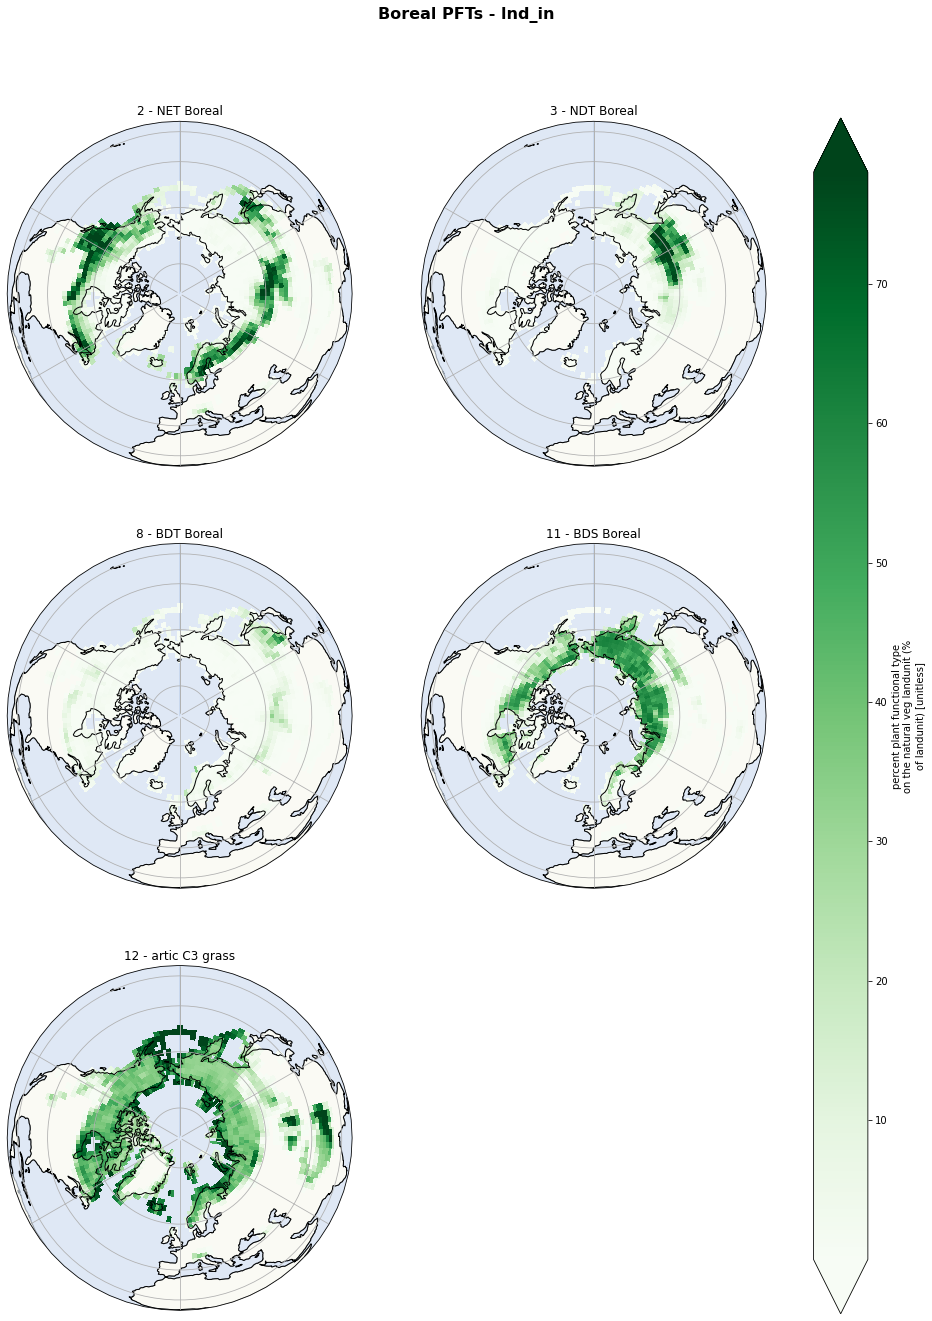

In [70]:
proj = ccrs.PlateCarree()
map_proj = ccrs.Orthographic(0, 90)

titles=['2 - NET Boreal','3 - NDT Boreal','8 - BDT Boreal','11 - BDS Boreal','12 - artic C3 grass']

p=pfts_b_mask.plot.pcolormesh(x='lsmlon', y='lsmlat', col='natpft', col_wrap=2,
                              robust=True,cmap='Greens', transform=proj, 
                              subplot_kws={'projection':map_proj},
                              figsize=(17, 22))


for i, ax in enumerate(p.axes.flat):
    ax.coastlines()
    ax.gridlines()
    ax.add_feature(cartopy.feature.OCEAN, zorder=0, alpha=0.3)
    ax.add_feature(cartopy.feature.LAND, zorder=0, edgecolor='black', alpha=0.3)
    if i<5: 
        ax.set_title(titles[i])

plt.suptitle("Boreal PFTs - lnd_in", fontsize = 16, y = 0.95, fontweight = 'bold')
p.fig.tight_layout()
plt.show()

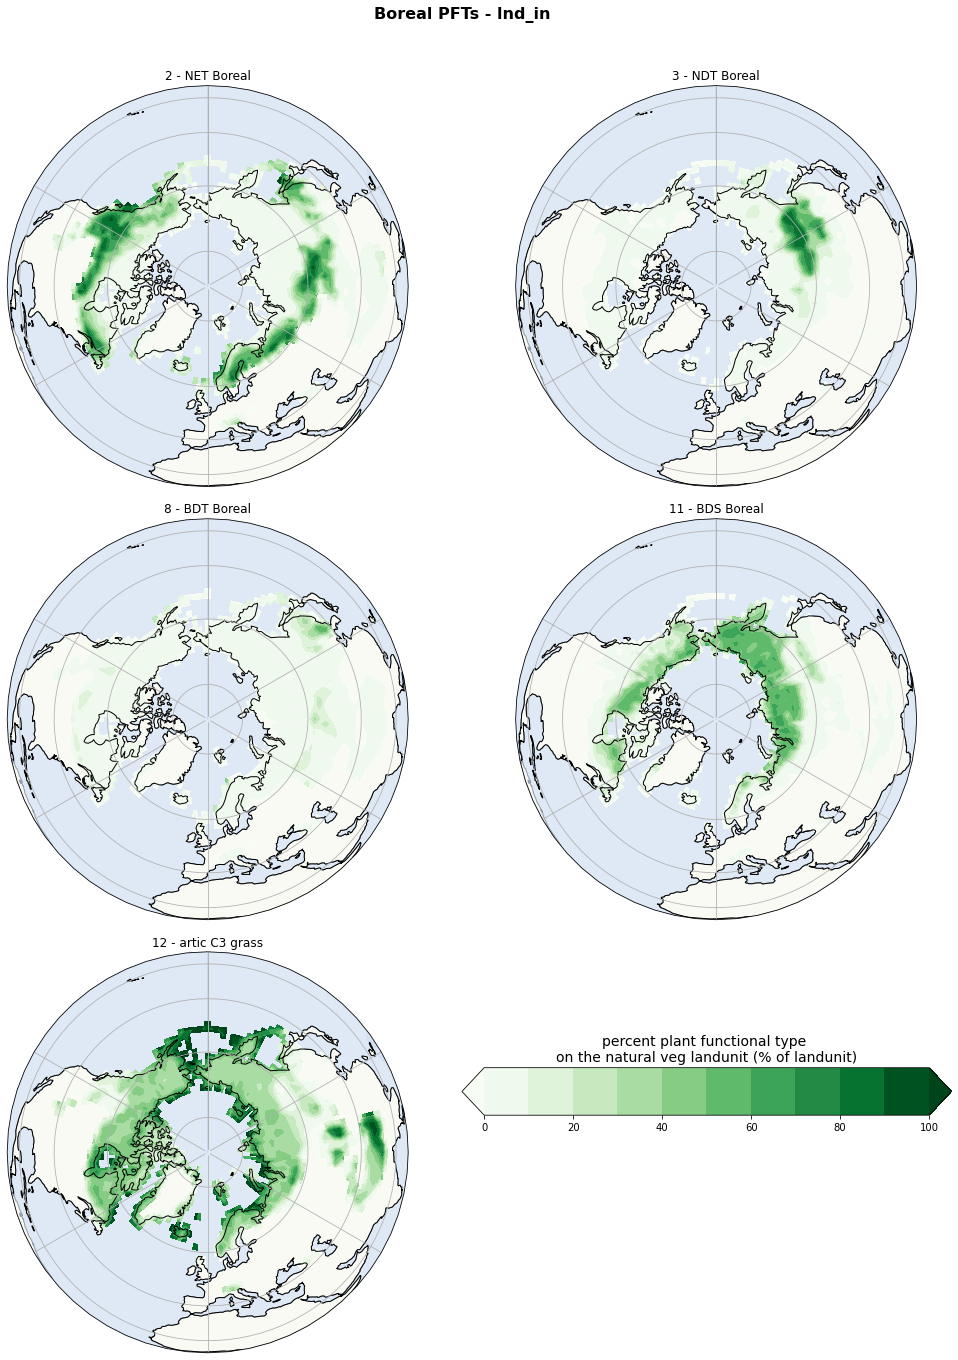

In [87]:
proj = ccrs.PlateCarree()
map_proj = ccrs.Orthographic(0, 90)

titles=['2 - NET Boreal','3 - NDT Boreal','8 - BDT Boreal','11 - BDS Boreal','12 - artic C3 grass']

p=pfts_b_mask.plot.pcolormesh(x='lsmlon', y='lsmlat', col='natpft', col_wrap=2,
                              robust=True,cmap='Greens', transform=proj, 
                              subplot_kws={'projection':map_proj},
                              add_colorbar=False,figsize=(17, 22))


for i, ax in enumerate(p.axes.flat):
    ax.coastlines()
    ax.gridlines()
    ax.add_feature(cartopy.feature.OCEAN, zorder=0, alpha=0.3)
    ax.add_feature(cartopy.feature.LAND, zorder=0, edgecolor='black', alpha=0.3)
    if i<5: 
        ax.set_title(titles[i])
        data,lons=add_cyclic_point(pfts_b_mask.isel(natpft=i).values,coord=pfts_b_mask['lsmlon'])
        cs=ax.contourf(lons,pfts_b_mask['lsmlat'],data, transform = proj, 
                            cmap ='Greens', extend='both', levels = np.linspace(0,100, 11) )

plt.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.9, wspace=0.08, hspace=0.08)
cbar_ax = p.fig.add_axes([0.5, 0.25, 0.4, 0.03]) #[left, bottom, width, height]
cbar=p.fig.colorbar(cs,cax=cbar_ax ,orientation='horizontal')
cbar.ax.set_title('percent plant functional type \non the natural veg landunit (% of landunit)', size = 14 )

plt.suptitle("Boreal PFTs - lnd_in", fontsize = 16, y = 0.95, fontweight = 'bold')
#p.fig.tight_layout()
plt.show()

In [89]:
subplot_kws=dict(projection=ccrs.Robinson())

plt.figure(figsize=[12,8])
p = sst_plot.plot(x='geolon', y='geolat',
                  vmin=-2, vmax=32,
                  cmap=cmocean.cm.thermal,
                  subplot_kws=subplot_kws,
                  transform=ccrs.PlateCarree(),
                  add_labels=False,
                  add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(p, ticks=[0,4,8,12,16,20,24,28,32], shrink=0.6)
cb.ax.tick_params(labelsize=18)

# background
url = 'http://map1c.vis.earthdata.nasa.gov/wmts-geo/wmts.cgi'
p.axes.add_wmts(url, 'BlueMarble_NextGeneration')

NameError: name 'sst_plot' is not defined

<Figure size 864x576 with 0 Axes>

In [90]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

import xarray as xr

# Read the data
url = 'https://github.com/mapbox/rasterio/raw/master/tests/data/RGB.byte.tif'
da = xr.open_rasterio(url)

# The data is in UTM projection. We have to set it manually until
# https://github.com/SciTools/cartopy/issues/813 is implemented
crs = ccrs.UTM('18N')

# Plot on a map
ax = plt.subplot(projection=crs)
da.plot.imshow(ax=ax, rgb='band', transform=crs)
ax.coastlines('10m', color='r')
plt.show()

ModuleNotFoundError: No module named 'rasterio'

In [45]:
ax

<GeoAxesSubplot:title={'center':'2 - NET Boreal'}, ylabel='latitude [degrees north]'>

In [47]:
data, lons=add_cyclic_point(pfts_b_mask.values,coord=pfts_b_mask['lsmlon'])

In [52]:
pfts_b.values.shape

(5, 96, 144)

In [50]:
data.shape

(5, 96, 145)

In [55]:
pfts_b_mask

<xarray.DataArray 'PCT_NAT_PFT' (natpft: 5, lsmlat: 96, lsmlon: 144)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * natpft   (natpft) int64 2 3 8 11 12
  * lsmlat   (lsmlat) float64 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lsmlon   (lsmlon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Attributes:
    long_name:  percent plant functional type on the natural veg landunit (% ...
    units:      unitless

In [ ]:

    data = dataset.relative_slope*100
    data,lons=add_cyclic_point(data,coord=dataset['lon'])

    cs=axs[i].contourf(lons,dataset['lat'],data,
                          transform = ccrs.PlateCarree(),
                          cmap='coolwarm',extend='both', levels = np.linspace(-5, 5, 21) )
    
    axs[i].set_title(model)
    axs[i].coastlines(resolution='110m')
    

# add some stuff
for i in [7,8]:
    fig.delaxes(axs[i])
fig.subplots_adjust(bottom=0.2, top=0.9, left=0.1, right=0.9,
                    wspace=0.02, hspace=0.02)
cbar_ax = fig.add_axes([0.45, 0.3, 0.4, 0.03])

# Draw the colorbar
cbar=plt.colorbar(cs,cax=cbar_ax , orientation='horizontal')
cbar.ax.set_title('Relative trend [%/yr]', size = 14 )
fig.suptitle('AOD trend CMIP6 2000 - 2014', fontsize = 16, y = 0.95, fontweight = 'bold')

In [ ]:
p

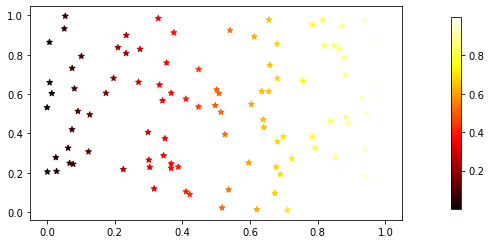

In [22]:
# Import numpy and matplotlib
import numpy as np
from matplotlib import pyplot as plt

# Set the figure size
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

N = 100

# Create x and y data points
x = np.random.rand(N)
y = np.random.rand(N)

# Scatter plot with x and y data points
s = plt.scatter(x, y, c=x, cmap='hot', marker='*')

# Add a colorbar with pad value
plt.colorbar(s, shrink=0.9, pad=0.1)

# Display the plot
plt.show()

In [23]:
s

In [ ]:
proj = ccrs.PlateCarree()
map_proj = ccrs.Orthographic(0, 90)

#p = air.plot(transform=ccrs.PlateCarree(),  # the data's projection
             #col='ntaptf', col_wrap=3,  # multiplot settings
             #aspect=ds.dims['lon'] / ds.dims['lat'],  # for a sensible figsize
             #subplot_kws={'projection': map_proj})  # the plot's projection

#fig, axs = plt.subplots(2,3,subplot_kw={'projection': ccrs.Orthographic(0, 90)},figsize=(15,10))


fig = plt.figure(1, figsize=[13,13],dpi=300)

#ax = plt.axes(projection=ccrs.Orthographic(0, 90))

#ax.add_feature(cartopy.feature.OCEAN, zorder=0)
#ax.add_feature(cartopy.feature.LAND, zorder=0, edgecolor='black')
#functions.polarCentral_set_latlim([65,90], ax)
#axs.coastlines()
#axs.gridlines()
p=pfts_b_mask.plot.pcolormesh(x='lsmlon', y='lsmlat', col='natpft', col_wrap=3, robust=True,cmap='Greens', transform=proj, subplot_kws={'projection':map_proj})#transform=ccrs.PlateCarree())
for ax in p.axes.flat:
    ax.coastlines()
    ax.set_aspect('equal', 'box-forced')
#ax.add_feature(cartopy.feature.OCEAN, zorder=0, alpha=0.3)
#ax.add_feature(cartopy.feature.LAND, zorder=0, edgecolor='black', alpha=0.3)
#url = 'http://map1c.vis.earthdata.nasa.gov/wmts-geo/wmts.cgi'
#ax.add_wmts(url, 'BlueMarble_NextGeneration')
plt.show()

In [ ]:
for ax, title in zip(g.axes.flat, list("abcd")):
    ax.set_title(title)

In [ ]:
#REGREDING: https://github.com/NCAR/ctsm_python_gallery/blob/master/notebooks/PFT-Gridding.ipynb
#to visualize: http://localhost:8889/notebooks/Desktop/forces-2021/content/learning/example-notebooks/projections.ipynb

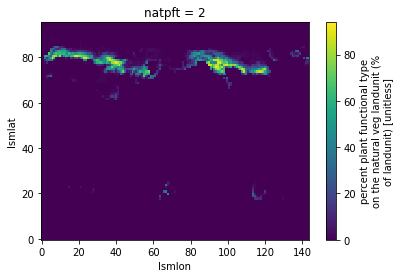

In [17]:
dset_in.PCT_NAT_PFT.isel(natpft=2).plot()

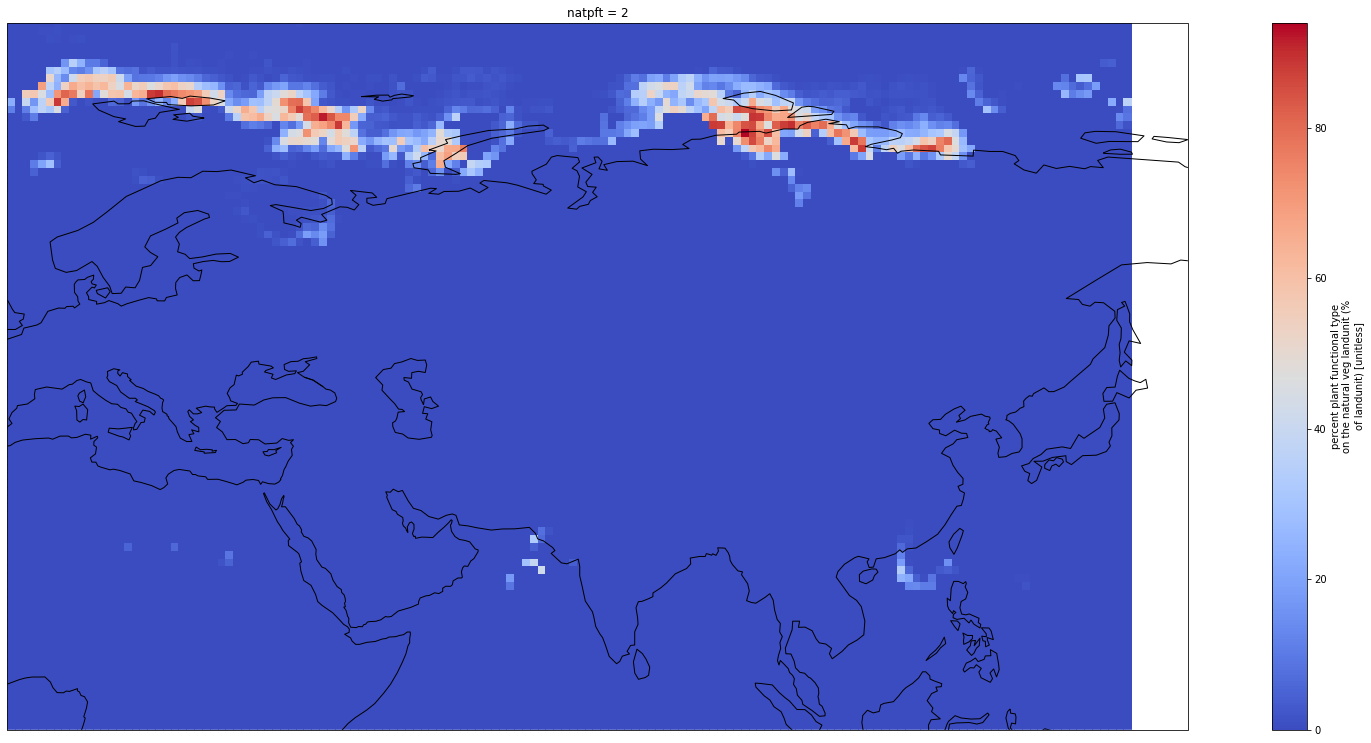

In [18]:
fig = plt.figure(1, figsize=[30,13])
ax = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.coastlines()

dset_in.PCT_NAT_PFT.isel(natpft=2).plot.pcolormesh(ax=ax, x='lsmlon', y='lsmlat', cmap='coolwarm')

NameError: name 'lon' is not defined

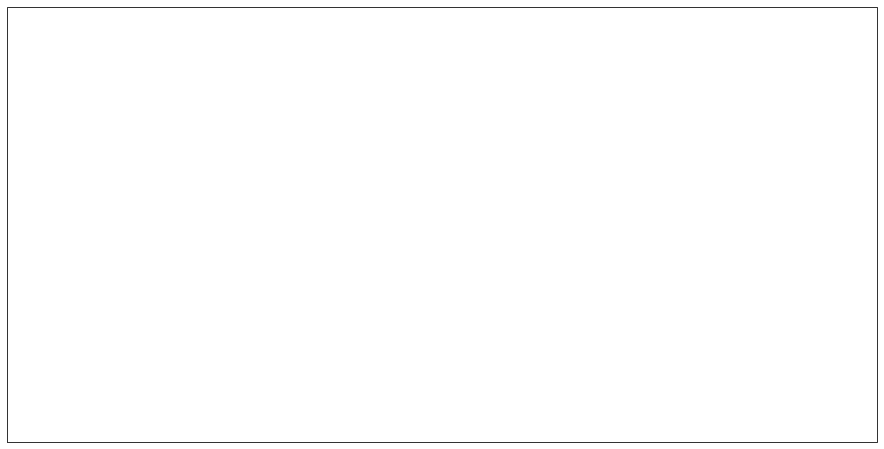

In [20]:
plt.figure(figsize=(20,8))

#Define projection
ax = plt.axes(projection=ccrs.PlateCarree())

#plot the data
plt.contourf(lon,lat,var_srf,cmap='Spectral_r')

# add coastlines
ax.add_feature(cfeature.COASTLINE)

#add lat lon grids
gl = ax.gridlines(draw_labels=True, color='lightgrey', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False

# Titles
# Main
plt.title("Global map of CAM-chem CO, January 2018",fontsize=18)

# y-axis
ax.text(-0.04, 0.5, 'Latitude', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax.transAxes)
# x-axis
ax.text(0.5, -0.08, 'Longitude', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor',
        transform=ax.transAxes)
# legend
ax.text(1.15, 0.5, 'CO (ppb)', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax.transAxes)

plt.colorbar()
plt.show()

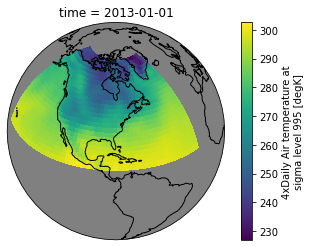

In [12]:
import cartopy.crs as ccrs

air = xr.tutorial.open_dataset("air_temperature").air

p = air.isel(time=0).plot(subplot_kws=dict(projection=ccrs.Orthographic(-80, 35), facecolor="gray"),transform=ccrs.PlateCarree(),)
p.axes.set_global()
p.axes.coastlines()